In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy
import statsmodels.stats.api as sms
import matplotlib.patches as mpatches
import random

In [2]:
def plot_normal_distribution(series, conf_int, samples=1000, columns=20, dens = True):
    """
    will plot normal distribution
    args
        series(list)      : Series that the normal distribution will be done on
        conf_int(float)   : Confidence intervall percentage (alpha value)
        samples(int)      : amount of samples to take
        columns(int)      : columns of diagram
        dens(bool)        : If true then the function will plot density probability function
    """
    mu = (np.mean(series))
    sigma = np.std(series)
    
    s = np.random.seed(100)
    s = np.random.normal(mu, sigma, samples)

    col_n = columns #amount of columns
    ci = scipy.stats.norm.interval(0.95, loc=mu, scale=sigma)
    print(ci)
    
    plt.figure()
    count, bins, ignored = plt.hist(s, col_n, density=dens)
    #count, bins, ignored = plt.hist(s, col_n)

    one_x, one_y = [ci[0], ci[0]], [0,0.2]
    two_x, two_y = [ci[1], ci[1]], [0,0.2]

    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
    plt.plot(one_x, one_y, two_x, two_y, marker = 'o')
    plt.xlabel('flow [kg/min]')
    plt.savefig("normal_dist.png")
    plt.show()

In [3]:
def correlation(x,y):
    """
    Will find the correlation between two value series
    args:
        x(list)              : x values
        y(list)              : y values
    
    returns:
        correlation(float)   : Correlation number
    """
    #calculate mean
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    if (len(y) == len(x)):
        sum_top = 0.0
        sum_bottom_x = 0.0
        sum_bottom_y = 0.0
        for i in range(0, len(x)):
            sum_top += (x[i] - mean_x)*(y[i] - mean_y)
            sum_bottom_x += (x[i] - mean_x)**2
            sum_bottom_y += (y[i] - mean_y)**2
        correlation = sum_top/(sqrt(sum_bottom_x*sum_bottom_y))
        return correlation
    else:
        return False

In [4]:
def find_val_change(series):
    """
    Will find value change in list
    args:
        series(list)             : Series to see change (Setpoint for our use)
    return:
        indexes(list)            : Indexes of change in series
    """
    indexes = ([i for i in range(len(series)) if series[i]!=series[i-1]])
    return indexes

In [5]:
def mean_confidence_interval(data, confidence=0.95):
    """
    Calculates the mean, and confidence intervals for a dataset/sample set
    args:
        data(list)                  : List of sample data to find limits on
        confidence(float)           : Desired confidence to find limits
    returns:
        mean                        : average value for dataset
        up_lim(float)               : Upper limit for sample set
        low_lim(float)              : Lower limit for sample set
    """
    #Between two limits based on confidence
    a = 1.0 * np.array(data)
    n = len(a)
    mean, std = np.mean(a), scipy.stats.sem(a)
    h = std * scipy.stats.t.ppf((1+ confidence) / 2., n-1)
    low_lim, up_lim = mean-h, mean+h
    return mean, low_lim, up_lim


In [6]:
def find_limit(sample_data, confidence = 0.95):
    """
    Finds upper and lower limits with tails in normal distribution
    args:
        sample_data(list)           : List of sample data to find limits on
        confidence(float)           : Desired confidence to find limits
    return:
        up_lim(float)               : Upper limit for sample set
        low_lim(float)              : Lower limit for sample set
    """
    #With tails
    x_mean = np.mean(sample_data)
    z = scipy.stats.norm.ppf(confidence)
    std = np.std(sample_data)
    n = len(sample_data)
    up_lim = x_mean + z * (std/sqrt(n))
    low_lim = x_mean - z * (std/sqrt(n))
    return up_lim, low_lim


In [7]:
def get_samples(data, n=36):
    """
    Gets random samples from data set
    args:
        data(list)          : dataset to take the samples from
        n(int)              : Desired sample size
    return:
        sample_data(list)   : sample data list
    """
    sample_data = list()
    for i in range(0,n):
        random_index = random.randint(0,len(data)-1)
        sample_data.append(data[random_index])

    return sample_data

In [8]:
def EWMA_filter(T_kp1, T_kp, t_s = 0.1, T_f=2.0):
    """
    Moving average filter.
    args:
        T_kp1(float)         : Value at kp = 1, desired filtered value.
        T_kp(float)          : Value at kp = 0, previous filtered value.
        t_s(float)           : Timestep
        T_f(float)           : Filter constant
    return:
        T_kp1(float)         : Filtered value
    """
    a = t_s / (T_f + t_s)
    T_kp1f = (1-a)*T_kp + a * T_kp1
    return T_kp1f

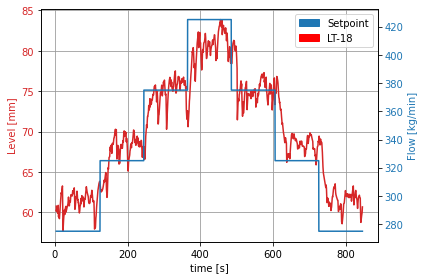

In [9]:
#Finn ut l/min istedenfor kg/min
#Implement low pass filter instead of EWMA


path = "sensordata/experiment1.csv"
exp1_df = pd.read_csv(path, sep=';')

path2 = "sensordata/experiment2filter.csv"
exp2_df = pd.read_csv(path2, sep=';')

#Change sens_df to either exp1_df for withour filter or exp2_df with filter
sens_df = exp1_df

time = exp1_df["Time"]
# df columns, FT-14A, FT-14B, LT-17, LT-18, LT-15, FT-20A, LT-23, LT-19, Time, SP-01.
#plt.plot(time, exp1_df["FT-14A"])

"""plt.plot(time, sens_df["FT-14A"], 'b', label='FT-14A')
plt.plot(time, sens_df["SP-01"], 'r', label='Setpoint')
plt.ylabel('Flow [kg/min]')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(b=True, which='major', color='#999999', linestyle='-')
"""
fig, ax1 = plt.subplots()
plt.grid(b=True, which='major', color='#999999', linestyle='-')

data = sens_df["LT-18"]
color = 'tab:red'
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Level [mm]', color=color)
ax1.plot(time, data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

data = sens_df["SP-01"]
color = 'tab:blue'
ax2.set_ylabel('Flow [kg/min]', color=color)
ax2.plot(time, data, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()

red_patch = mpatches.Patch(color='red', label='LT-18')


blue_patch = mpatches.Patch(color=color, label='Setpoint')
plt.legend(handles=[blue_patch, red_patch])

plt.show()


In [10]:
len(data)

8406

In [11]:
sp = sens_df["SP-01"].tolist()
sp.append(8405)

sp_val = [sp[100], sp[1300],sp[2500], sp[3700], sp[4900], sp[6100], sp[7300]]
print(sp_val)
setpoint = find_val_change(sp)
print(setpoint)
print(sp[8405])

[275.0, 325.0, 375.0, 425.0, 375.0, 325.0, 275.0]
[0, 1201, 2402, 3603, 4804, 6005, 7206, 8406]
275.0


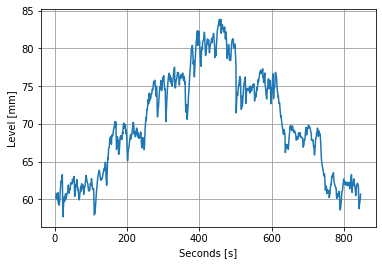

In [12]:
# Converting each dataframe column to list
ft_14a = sens_df["FT-14A"].tolist()
lt_18 = sens_df["LT-18"].tolist()
lt_17 = sens_df["LT-17"].tolist()
lt_15 = sens_df["LT-15"].tolist()


#creating a list of lists, just add more df columns above, and add name to sens_name and sensor to get more corr vals.
sensor = [lt_18, lt_17, lt_15, ft_14a]
sens_name = ["LT-18", "LT-17", "LT-15", "FT-14A"]

#all LT correlates positively with FT-14A with 95% or more.

d = {'Name':sens_name}
plt.plot(time, lt_18)
plt.xlabel('Seconds [s]')
plt.ylabel('Level [mm]')
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.show()

In [13]:
# Finding correlation between all sensors.
for i in range(0,len(sensor)):
    temp = list()
    for j in range(0,len(sensor)):
        corr = round(correlation(sensor[i], sensor[j])*100, 2)
        temp.append(corr)
    d[f"{sens_name[i]}"] = temp
# Creating data frame to better display results
df = pd.DataFrame(data = d)
df

,Name,LT-18,LT-17,LT-15,FT-14A
0,LT-18,100.00,97.87,97.48,95.14
1,LT-17,97.87,100.00,98.38,96.14
2,LT-15,97.48,98.38,100.00,95.31
3,FT-14A,95.14,96.14,95.31,100.00


In [14]:
variable = ft_14a

(273.503083360377, 276.255363709137)


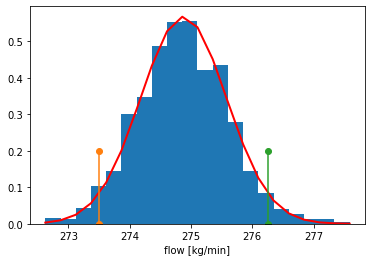

0.7021252355833233


In [15]:
dt = 0.1 # 100ms
#flow measurement at first setpoint.

sp0 = variable[setpoint[0]+100:setpoint[1]]

sp1 = variable[setpoint[6]+100:setpoint[7]]
sp = sp0 + sp1

plot_normal_distribution(sp, 0.95)
print(np.std(sp))


(250.31587633109754, 352.804796127634)


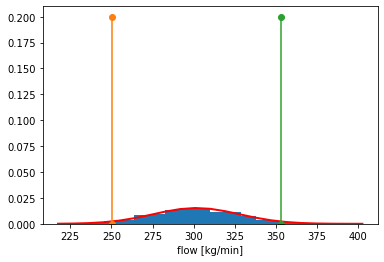

26.145613032932232


In [16]:
sp1 = variable[setpoint[5]:setpoint[6]]
sp = sp0 + sp1

plot_normal_distribution(sp, 0.95)
print(np.std(sp))

(372.88357937897507, 377.1247521378279)


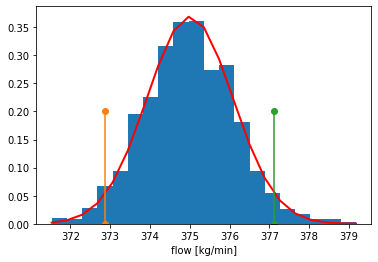

1.0819517073544958


In [17]:
sp0 = variable[setpoint[2]+100:setpoint[3]]
sp1 = variable[setpoint[4]+100:setpoint[5]]
sp = sp0 + sp1

plot_normal_distribution(sp, 0.95)
print(np.std(sp))

In [18]:
sens_df["SP-01"][setpoint[4]]

375.0

(423.0119481583041, 426.9757993439665)


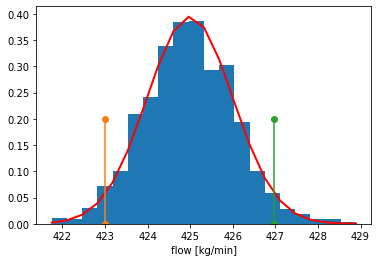

1.0112051080858426


In [19]:
sp = variable[setpoint[3]+100:setpoint[4]]

plot_normal_distribution(sp, 0.95)
print(np.std(sp))

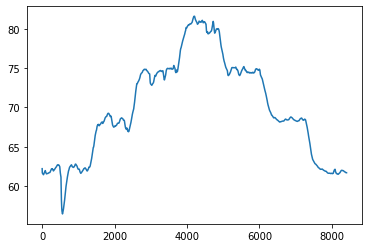

In [20]:
filtered = list()
ftime = True
for i in range(0, len(lt_15), 1):
    if(ftime):
        filtered.append(EWMA_filter(lt_15[i], lt_15[i]))
    else:
        filtered.append(EWMA_filter(lt_15[i], lt_15[i-1]))
plt.plot(filtered)

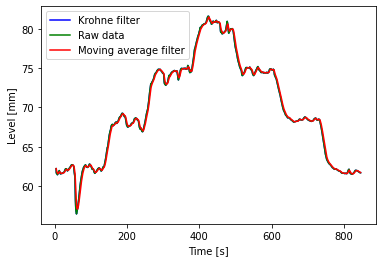

In [21]:
lt_15 = sens_df["LT-15"].tolist()

lt_15_emwa = list()
ftime = True
for i in range(0, len(lt_15), 1):
    if(ftime):
        lt_15_emwa.append(EWMA_filter(lt_15[i], lt_15[i], T_f = 2))
        ftime=False
    else:
        #noice =  random.randrange(-5, 5)/10
        lt_15[i] = lt_15[i]
        lt_15_emwa.append(EWMA_filter(lt_15[i], lt_15_emwa[i-1], T_f = 2))
        #print(f"Filtered value: {lt_15_emwa[i]}, unfiltered: {lt_15[i]}")



lt_15_krohne_filter = exp1_df["LT-15"].tolist()

plt.plot(time, lt_15_krohne_filter, color='blue', label='Krohne filter')

plt.plot(time, lt_15, color='green', label='Raw data')
plt.plot(time, lt_15_emwa, color='red', label='Moving average filter')

plt.ylabel("Level [mm]")
plt.xlabel("Time [s]")

red_patch = mpatches.Patch(color='red', label='')
plt.legend()
plt.show()


# Low pass filter implementation

In [22]:
from scipy.signal import butter, lfilter, freqz, lfilter_zi

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='lowpass', analog = False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a)
    y, zf = lfilter(b, a, data, zi=zi*data[0])
    return y, zf


In [23]:
order = 3
fs = 30
cutoff = 0.1

b, a = butter_lowpass(cutoff, fs, order)

data = lt_15 #np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
y, zf = butter_lowpass_filter(data, cutoff, fs, order)

lt_15_filter = exp1_df["LT-15"].tolist()

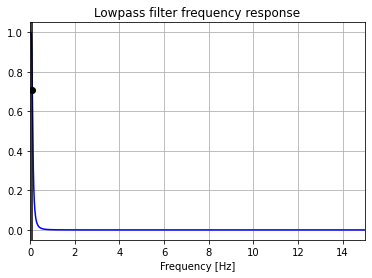

In [24]:
w, h = freqz(b, a, worN=8000)

plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass filter frequency response")
plt.xlabel('Frequency [Hz]')
plt.grid()

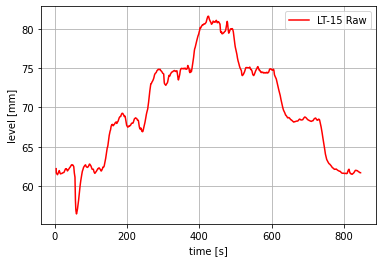

8406


In [25]:
plt.plot(time, data, 'r-', label='LT-15 Raw')

#plt.plot(time, y, 'b-', linewidth=2, label='lowpass filter LT-15')
#plt.plot(time, lt_15_filter, 'g-', linewidth=2, label='Krohne filter LT-15')
#plt.plot(time, lt_15_emwa, color='red', label='Moving average filter')
plt.xlabel('time [s]')
plt.ylabel('level [mm]')
plt.grid()
plt.legend()
plt.show()

print(len(y))
